In [53]:
import numpy as np

In [54]:
class MultiClassLogisticRegression:
    def __init__(self, n_features, n_classes):
        self.n_features = n_features
        self.n_classes = n_classes
        self.W = np.random.randn(n_features, n_classes)
        self.b = np.random.randn(n_classes)
        self.losses = []
        
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def cross_entropy(self, y, y_hat):
        return -np.sum(y * np.log(y_hat)) / y.shape[0]
    
    def forward(self, X):
        z = np.dot(X, self.W) + self.b
        y_hat = self.softmax(z)
        return y_hat
    
    def backward(self, X, y, y_hat, lr):
        grad_W = np.dot(X.T, (y_hat - y))
        grad_b = np.sum(y_hat - y, axis=0)
        self.W -= lr * grad_W
        self.b -= lr * grad_b
        
    def fit(self, X, y, epochs=100, lr=0.1):
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = self.cross_entropy(y, y_hat)
            self.losses.append(loss)
            self.backward(X, y, y_hat, lr)
            print('iteration=',i+146,' weights[0]:',self.W[0])
            
    def predict(self, X):
        y_hat = self.forward(X)
        return np.argmax(y_hat, axis=1)

iteration= 146  weights[0]: [-0.74650734  0.46383784 -0.24776028 -1.09745068 -2.14011075  0.09445466
  1.26936992  0.45956024  0.52456591  0.53090607]
iteration= 147  weights[0]: [        nan  0.46383784         nan         nan -2.14011075         nan
         nan         nan  0.52456591         nan]
iteration= 148  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 149  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 150  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 151  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 152  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 153  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 154  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 155  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 156  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 157  weights[0]: [nan nan nan nan nan nan nan nan nan nan

/tmp/ipykernel_9512/101988876.py:10: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
/tmp/ipykernel_9512/101988876.py:10: RuntimeWarning: invalid value encountered in divide
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
/tmp/ipykernel_9512/101988876.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(y_hat)) / y.shape[0]
/tmp/ipykernel_9512/101988876.py:13: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(y_hat)) / y.shape[0]


iteration= 256  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 257  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 258  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 259  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 260  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 261  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 262  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 263  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 264  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 265  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 266  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 267  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 268  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 269  weights[0]: [nan nan nan nan nan nan nan nan nan nan]
iteration= 270  weig

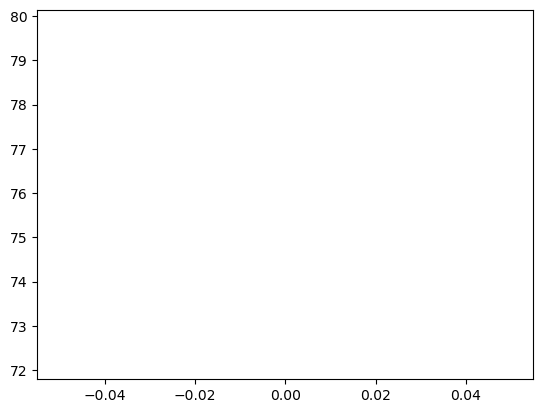

0.09905397885364496


In [55]:
#test case
data = np.loadtxt('optdigits.tra', delimiter=',')
X = data[:, :-1]
y = data[:, -1].astype(int)
y_onehot = np.zeros((y.shape[0], 10))
y_onehot[np.arange(y.shape[0]), y] = 1
model = MultiClassLogisticRegression(X.shape[1], 10)
model.fit(X, y_onehot, epochs=1000, lr=0.1)
import matplotlib.pyplot as plt
plt.plot(model.losses)
plt.show()
test_data = np.loadtxt('optdigits.tes', delimiter=',')
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))

In [56]:
class MultiClassLogisticRegression:
    def __init__(self, lr=0.1, n_iter=1800, epsilon=2*1e-5):
        self.learning_rate = lr
        self.n_iter = n_iter
        self.tolerance = epsilon
        self.weights = None
        self.bias = None
        self.K = None  #number of classes

    def pre_process(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    softmax = lambda self, z: np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def encode(self,n_features, y):
        """return one-of-K labels matrix"""
        Y_lables = np.zeros((n_features, self.K))
        for i in range(n_features):
            Y_lables[i, y[i]] = 1
        return Y_lables

    loss = lambda self, X, Y: -np.sum(Y * np.log(self.softmax(X)))
    
    def gradient_descent(self,X,Y):
        Y_k = self.softmax(np.dot(X, self.weights) + self.bias)
        self.weights -= self.learning_rate * np.dot(X.T, (Y_k - Y))
        self.bias -= self.learning_rate * np.sum(Y_k - Y, axis=0, keepdims=True)

    def train(self, X, y):
        self.K = len(np.unique(y))
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, self.K)
        self.bias = np.random.randn(1, self.K)
        Y = self.encode(n_samples, y)
        for i in range(self.n_iter):
            self.gradient_descent(X, Y)
            loss = self.loss(np.dot(X, self.weights) + self.bias, Y)
            if loss < self.tolerance:
                break

    def predict(self, X):
        return np.argmax(self.softmax(np.dot(X, self.weights) + self.bias), axis=1)